<h3> Progetto di : Marco Hu , Davide Lega, Vlad Mattiussi.</h3>

<h1> 1) Descrizione del problema</h1> 

<h3>1.1 Presentazione del dominio applicativo </h3>

Il progetto consiste nel analizzare dati recuperati dal sito <link> https://myanimelist.net/topanime.php </link> riguardanti la valutazione data da un utenti ad anime (cartoni animati giapponesi), in particolare lo scopo del progetto è quello di svolgere un analisi di reccomendation , dove, dato un utente, consigliamo i migliori n anime in base ai suoi gusti.

<h3>1.2 Contenuto</h3>

Utilizzeremo due file csv rispettivamente rating.csv e anime.csv .

Da rating.csv riusciremo ottenere un DataFrame che mostrerà tuple rappresentanti singole valutazioni fatte da utenti (identificati tramite id) ad anime (identificati tramite id) rating rappresenta il voto dato (-1 se la valutazione non mai avvenuta)

Da anime.csv otteniamo invece un DataFrame che contiene informazioni aggiuntive rispetto ai singoli anime

<h3>1.3 Glossario delle variabili </h3>

All interno di rating.csv :

  <li>user_id : Identificativo univoco rappresentante un utente.</li> 
  <li>anime_id : Identificativo univoco rappresentante un anime.</li> 
  <li>rating : Voto dato dall' utente identificato con user_id all'anime                       identificato con anime_id. </li> 
  
All interno di anime.csv :


<li>anime_id : Identificativo univoco rappresentante un anime.</li> </li>
<li>name : nome dell anime </li>
<li>genre : tags rappresentati il genere di appartenenza dell anime</li>
<li>type : tags rappresentante il tipo di pubblicazione del anime film,tv,oav..</li>
<li>episodes : numero di apisodi dell anime</li>
<li>rating : media dei voti ricevuti dall anime </li>
<li>members : numero di persone che lo hanno aggiunto alla loro animelist </li>
  

<h1>2) Caricamento e preparazione dei dati</h1>

<h3>2.1 Setup delle librerie utilizzate</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#conda install -c conda-forge scikit-surprise

<h3>2.2 Caricamento dei dati dei file csv</h3>

In [3]:
AnimeDF = pd.read_csv('anime.csv')
RatingDF = pd.read_csv('rating.csv')

<h1>3) Analisi Esplorativa</h1>

Mostriamo ora la forma e le informazioni principali contenute in RatingDF

In [4]:
RatingDF.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [5]:
RatingDF.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,7813737.0,36727.956745,20997.946119,1.0,18974.0,36791.0,54757.0,73516.0
anime_id,7813737.0,8909.072104,8883.949636,1.0,1240.0,6213.0,14093.0,34519.0
rating,7813737.0,6.144030,3.727800,-1.0,6.0,7.0,9.0,10.0


Mostriamo ora la forma e le informazioni principali contenute in AnimeDF

In [6]:
AnimeDF.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [7]:
AnimeDF.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [8]:
RatingDF.nunique()

user_id     73515
anime_id    11200
rating         11
dtype: int64

il nostro DataFrame conta 73515 utenti diversi e 11200 anime 

<p>Grafico della distribuzione dei voti ( -1 indica un anime non votato dall'utente )</p>

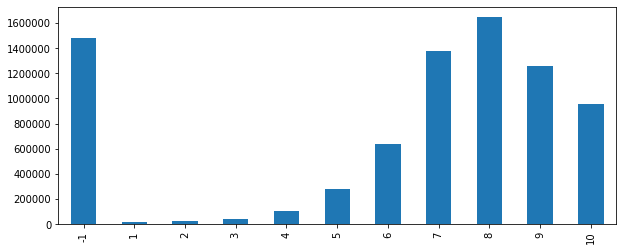

In [9]:
RatingDF["rating"].value_counts().sort_index().plot.bar(figsize=(10, 4))

Eliminiamo tutti le tuple che indicano una mancata valutazione da parte di un'utente per un determinato anime, poichè sono inutili.

In [10]:
CleanDF = RatingDF[RatingDF["rating"] != -1]

Grafichiamo ora la distribuzione dei voti inerente solo alle valutazioni effettuate 

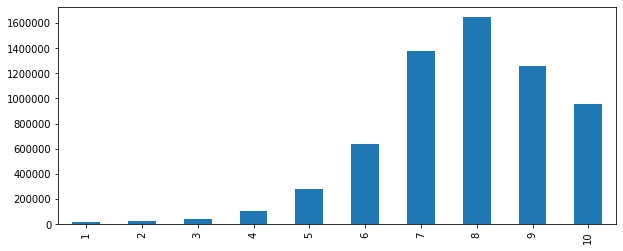

In [11]:
CleanDF["rating"].value_counts().sort_index().plot.bar(figsize=(10, 4))

In [12]:
CleanDF.head(5)

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


Limitiamo il data set alle prime 50 occorrenze per avere un'idea sulla distribuzione dei dati, in particolare si vuole vedere quanti voti da' un utente mediamente e quanti voti riceve un anime, in media

In [13]:
CleanDFlimit = CleanDF[CleanDF["user_id"]<50]
CleanDFlimit2 = CleanDF[CleanDF["anime_id"]<50]

Numero voti dati da ogni utente (primi 50)

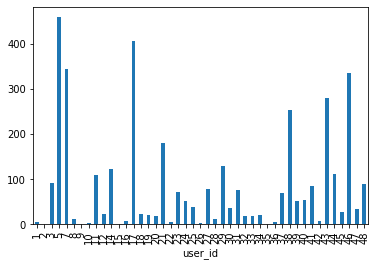

In [14]:
CleanDFlimit.groupby("user_id")["rating"].count().plot.bar()

Numero voti ricevuti per ogni anime (primi 50)

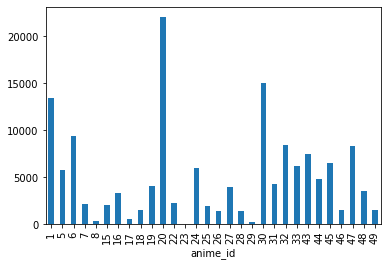

In [15]:
CleanDFlimit2.groupby("anime_id")["rating"].size().plot.bar()

Effettuaiamo un operazione di merging per ottenere un Dataframe dove si veda il nome dell'anime a cui è associata la votazione

In [16]:
MergedDF = CleanDF.merge(AnimeDF, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])
MergedDF.rename(columns = {'rating_user':'user_rating'}, inplace = True)

In [17]:
MergedDF = MergedDF[['user_id', 'name', 'user_rating']]
Merged_sub= MergedDF[MergedDF.user_id <= 100]
Merged_sub.head(5)

,user_id,name,user_rating
0,1,Highschool of the Dead,10
1,3,Highschool of the Dead,6
2,5,Highschool of the Dead,2
3,12,Highschool of the Dead,6
4,14,Highschool of the Dead,6


In [18]:
train_set, test_set =train_test_split(Merged_sub, test_size=0.2, random_state=42)

In [19]:
train_set.set_index(["user_id","name"], inplace=True)

In [20]:
train_set.head(5)

,,user_rating
user_id,name,
46,Junjou Romantica 3,4
44,Aquarion Evol,9
73,Break Blade 5: Shisen no Hate,8
95,Tonari no Totoro,10
11,Pokemon: The Origin,8


In [21]:
Train_Ratings = train_set["user_rating"].unstack("name") 

In questo modo possiamo visualizzare per ogni utente tutte le sue votazioni con NaN se la votazione non c'è mai stata.

In [22]:
Train_Ratings.head()

name,&quot;Bungaku Shoujo&quot; Movie,.hack//Sign,.hack//The Movie: Sekai no Mukou ni,07-Ghost,11eyes,11eyes: Momoiro Genmutan,91 Days,Absolute Duo,Accel World,Accel World EX,...,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,gdgd Fairies,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>4) Raccomendation User-based Collaborative filtering con similarità coseno</h1>

<li>Utilizzando la reccomendation user-based un voto predetto r^u,i previsto per un anime i da un utente u è determinato sulla base di voti dati da altri utenti al anime i opportunamente "pesati" in base alla similiratà che hanno con l'utente u.</li>
<li>La similarità tra utenti è calcolata a partire dai voti che entrambi hanno dato ad anime</li>


Abbiamo scelto di utilizzare la similarità coseno poichè ci era più familiare avendola affronta in aula.
La similarità coseno rappresenta la similarità tra due vettori tenendo conto dell'angolo formato tra essi.
Utilizzermo le formule viste in aula.

In [23]:
UM = Train_Ratings.fillna(0).values

In [24]:
UM[:5,:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [25]:
UM_bool = Train_Ratings.notna().values

In [26]:
UM_bool[:5,:5]

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

Eseguendo questo prodotto scalare, otteniamo il numeratore della nostra similarità coseno poichè è una somma di prodotti di anime che hanno visto entrambi gli utenti, dove è presente uno 0 (non visto/votato) il prodotto si annulla 


In [27]:
cos_num = UM @ UM.T

La matrice UM_bool_and è un'array tridimensionale che indica se u = user1 e v = user2 hanno visto un anime x 
UM_bool_and[u, v, i] == UM_bool[u, x] & UM_bool[v, x]


In [28]:
UM_bool_and = UM_bool[:, None, :] & UM_bool[None, :, :]
UM_com = UM_bool_and * UM[:, None, :]
UM_com_rss = np.sqrt(np.sum(np.square(UM_com), 2))
cos_denum = UM_com_rss * UM_com_rss.T
cos = cos_num / cos_denum

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [29]:
cos[:5, :5]

array([[1.        ,        nan, 1.        , 0.96225045, 1.        ],
       [       nan, 1.        , 1.        ,        nan,        nan],
       [1.        , 1.        , 1.        , 0.90846625, 0.98632794],
       [0.96225045,        nan, 0.90846625, 1.        , 0.8476102 ],
       [1.        ,        nan, 0.98632794, 0.8476102 , 1.        ]])

In [30]:
cos[np.isnan(cos)] = 0

Definiamo ora una funzione che dato un indice utente e un indice anime ritorna il voto predetto

In [31]:
def predict_from_all(u, a):
    other_users = list(np.where(UM_bool[:, a])[0])
    predicted_vote = (cos[u, other_users] @ UM[other_users, a]) / cos[u, other_users].sum()
    return predicted_vote if not np.isnan(predicted_vote) else UM[UM_bool].mean()

In [32]:
predict_from_all(3, 20)

8.42362994362252

Effettuiamo le operazioni di indicizzazzione precedemente fatte sul training set anche sul validation set.

In [33]:
test_set.set_index(["user_id","name"], inplace=True)

In [34]:
val_ratings = test_set["user_rating"].unstack("name") 

In [35]:
val_ratings = val_ratings.reindex_like(Train_Ratings)

Creiamo ora due matrici R e P in R sono presenti i voti dati dagli utenti agli anime, P invece è una matrice booleana dove è presente 0 se un'utente non ha votato per un anime 1 altrimenti.

In [36]:
R_val = val_ratings.fillna(0).values
P_val = val_ratings.notna().values

Creo un vettore con tutti i voti effettivamente dati nel validation set

In [37]:
actual = R_val[P_val]

Creiamo ora una funzione get_val_prediction che vuole in input una funzione predittiva pred_func che applica a tutte le coppie utente - anime dove P_val è true quindi il voto è stato assegnato.
Questa funziona ritorna una lista di valutazioni predette sugl' anime che effettivamente hanno già ricevuto una valutazione.

In [38]:
def get_val_predictions(pred_func):
    return np.array([pred_func(u, a)
                     for u, a in zip(*np.where(P_val))])

In [39]:
val_predictions = get_val_predictions(predict_from_all)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Questo ci permette di poter calcolare l'RMSE e il MAE definiamo quindi due funzioni una per il calcolo del RMSE e una per il calcolo del MAE.

In [40]:
def RMSE (actual,predicted):
    return np.sqrt(np.mean(np.square(predicted - actual)))

In [41]:
manualRMSE = RMSE(actual, val_predictions)

In [42]:
def MAE (actual,predicted):
    return np.mean(abs(predicted-actual))

In [43]:
manualMAE = MAE(actual,val_predictions)

In [44]:
manualMAE,manualRMSE

(1.4508386031975113, 2.0018702031745104)

In [45]:
rmse_mae_results = []
rmse_mae_results.append(("manual",manualRMSE,manualMAE))

Da quest'analisi possiamo notare che sia il MAE che l'RMSE sono molto alti utilizzando questo tipo di approccio quindi come fare per ottenere metodi predittivi più accurati?
Possiamo utilizzare Surpirse che mette a disposizione vari tools tra i quali funzioni per fare crossfold validation e quindi ricercare un algoritmo più performante.

<h1>5) Analisi con Surprise <h1>

Utilizziamo adesso surprise per fare una serie di studi e predizioni con gran parte degli algoritmi di predizione visti a lezione

In [46]:
from surprise import Reader
reader = Reader(sep=",",rating_scale=(0, 10))
from surprise import Dataset

Selezioniamo solo i primi mille utenti e non consideriamo le righe che indicano che non è stato assegnato nessuna valutazione all anime poichè quelle informazioni non sono utili .

In [47]:
CleanDF = CleanDF[CleanDF.user_id <= 100]
data = Dataset.load_from_df(CleanDF,reader)
CleanDF.iloc[:10]

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9


Dividiamo i dati in Train e Validation Set utilizzando surprise e train_test_split

In [48]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.20)

<p> Creiamo ora  delle funzioni che ci permetteranno di identificare id/nome anime </p>

In [49]:
def AnimeId(id):  
    a = 0
    b = a
    for n in (AnimeDF["anime_id"] == id):
        if n == True:
            b = a
        a = a + 1
    return b   

In [50]:
anime = []
def myFunc(a):
    return a[1]
for n in np.unique(CleanDF["anime_id"]):
    idx = AnimeId(n)
    name = AnimeDF.iloc[idx]["name"]
    anime.append((n,name))
anime.sort(key=myFunc)

In [51]:
anime[:10]

[(6408, '&quot;Bungaku Shoujo&quot; Movie'),
 (48, '.hack//Sign'),
 (298, '.hack//Tasogare no Udewa Densetsu'),
 (11375, '.hack//The Movie: Sekai no Mukou ni'),
 (5525, '07-Ghost'),
 (6682, '11eyes'),
 (7739, '11eyes: Momoiro Genmutan'),
 (32998, '91 Days'),
 (25397, 'Absolute Duo'),
 (11759, 'Accel World')]

Possiamo vedere la media globale di tutti i voti dati e altri infomazioni utili del trainset quali numero utenti,anime e voti.

In [52]:
trainset.global_mean,trainset.n_users,trainset.n_items,trainset.n_ratings

(7.710047063638224, 92, 1570, 4887)

In [53]:
from surprise.accuracy import rmse
from surprise import KNNBasic
from surprise.accuracy import mae

Iniziamo ora uno studio che attraverso l'utilizzo di cross validation che ci permette di valutare i vari algoritmi di predizione conosciuti nel corso per poi sceglierne il migliore.

In [54]:
from surprise.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Attraverso la funzione cross_validate effettuiamo la cross validation in questo primo caso valutiamo l'utilizzo del metodo user-based con similarità coseno 

In [55]:
from surprise.model_selection import cross_validate
model = KNNBasic(k=10, sim_options={"name": "cosine"})
cv_results = cross_validate(model, data, cv=kf)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


Utilizziamo il validation set per ottenere informazioni quali RMSE e MAE

In [56]:
results = pd.DataFrame(cv_results)
results

,test_rmse,test_mae,fit_time,test_time
0,2.056249,1.491123,0.006006,0.017015
1,2.150462,1.577015,0.007006,0.015014
2,1.866606,1.404650,0.005005,0.016014
3,1.893798,1.404921,0.007006,0.016015
4,1.991314,1.460540,0.006006,0.015014


Esempio di predizione

In [57]:
model.predict(3,20)

Prediction(uid=3, iid=20, r_ui=None, est=7.900570612624608, details={'actual_k': 10, 'was_impossible': False})

Utilizziamo il training set per ottenere informazioni quali RMSE e MAE

In [58]:
model.fit(trainset)
pred = model.test(testset)
rmse(pred),mae(pred)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.0091
MAE:  1.4757


(2.0090680276955197, 1.475669656082512)

Salviamo man mano la media degli RMSE e MAE dei vari algoritmi in questo array per poi alla fine fare un confronto e scoprire qual è il più accurato.

In [59]:
rmse_mae_results.append((("cosine",cv_results["test_rmse"].mean(),cv_results["test_mae"].mean())))

Effettuiamo l'analisi proposta precedentemente utilizzando pearson invece che la similarità coseno

In [60]:
model = KNNBasic(k=10, sim_options={"name": "pearson"})
cv_results = cross_validate(model, data, cv=kf)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [61]:
pd.DataFrame(cv_results)

,test_rmse,test_mae,fit_time,test_time
0,2.093890,1.543486,0.007006,0.016015
1,2.188150,1.606571,0.008007,0.015013
2,1.963553,1.466548,0.008007,0.015014
3,1.952620,1.455088,0.007006,0.014012
4,1.979218,1.478768,0.007006,0.015014


In [62]:
model.fit(trainset)
pred = model.test(testset)
rmse(pred),mae(pred)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.0418
MAE:  1.5162


(2.041819704030844, 1.5161528359165501)

In [63]:
rmse_mae_results.append(("person",cv_results["test_rmse"].mean(),cv_results["test_mae"].mean()))

Effettuiamo l'analisi proposta precedentemente con similarità coseno con medie.

In [64]:
from surprise import KNNWithMeans
model = KNNWithMeans(k=10, sim_options={"name": "cosine"})
cv_results = cross_validate(model, data, cv=kf)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [65]:
model.fit(trainset)
pred = model.test(testset)
rmse(pred),mae(pred)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.5721
MAE:  1.1768


(1.5720546473290808, 1.176817498644512)

In [66]:
pd.DataFrame(cv_results)

,test_rmse,test_mae,fit_time,test_time
0,1.570406,1.173363,0.007007,0.017016
1,1.654037,1.245225,0.007006,0.017015
2,1.491464,1.134024,0.007006,0.017016
3,1.500097,1.122147,0.007006,0.016015
4,1.512315,1.140657,0.007006,0.017015


In [67]:
rmse_mae_results.append(("means",cv_results["test_rmse"].mean(),cv_results["test_mae"].mean()))

Effettuiamo l'analisi proposta precedentemente utilizzando pearson invece che la similarità coseno per gli item invece che gli user.

In [68]:
model = KNNBasic(k=10, sim_options={"name": "cosine", "user_based": False})
cv_results = cross_validate(model, data, cv=kf)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [69]:
model.fit(trainset)
pred = model.test(testset)
rmse(pred),mae(pred)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.6350
MAE:  1.2212


(1.6349614703975326, 1.221180728231888)

In [70]:
pd.DataFrame(cv_results)

,test_rmse,test_mae,fit_time,test_time
0,1.645164,1.222725,0.389354,0.083076
1,1.719215,1.275514,0.384310,0.081074
2,1.537597,1.162205,0.404368,0.080072
3,1.589738,1.187023,0.388353,0.085078
4,1.572243,1.179754,0.399363,0.089082


In [71]:
rmse_mae_results.append(("item",cv_results["test_rmse"].mean(),cv_results["test_mae"].mean()))

In [72]:
from surprise import NormalPredictor
model = NormalPredictor()
cv_results = cross_validate(model, data, cv=kf)

In [73]:
model.fit(trainset)
pred = model.test(testset)
rmse(pred),mae(pred)

RMSE: 2.4780
MAE:  1.9151


(2.478043724613729, 1.9151162223294746)

In [74]:
pd.DataFrame(cv_results)

,test_rmse,test_mae,fit_time,test_time
0,2.608821,2.013501,0.004003,0.007011
1,2.612995,2.018082,0.005005,0.006005
2,2.522264,1.966305,0.005005,0.006005
3,2.619322,2.056125,0.005004,0.006006
4,2.567840,2.007459,0.005005,0.006005


In [75]:
rmse_mae_results.append(("normal",cv_results["test_rmse"].mean(),cv_results["test_mae"].mean()))

In [76]:
from surprise import SVD
model = SVD(n_factors=10, random_state=42)
cv_results = cross_validate(model, data, cv=kf)

In [77]:
model.fit(trainset)
pred = model.test(testset)
rmse(pred),mae(pred)

RMSE: 1.3910
MAE:  1.0620


(1.3910259388216153, 1.06202134519081)

In [78]:
pd.DataFrame(cv_results)

,test_rmse,test_mae,fit_time,test_time
0,1.387788,1.059755,0.062056,0.007007
1,1.494905,1.143480,0.064058,0.006006
2,1.367688,1.042314,0.063057,0.006006
3,1.384007,1.059965,0.064058,0.006071
4,1.365095,1.030787,0.063930,0.006005


In [79]:
rmse_mae_results.append(("SVD",cv_results["test_rmse"].mean(),cv_results["test_mae"].mean()))

In [80]:
plot_preparation = []
for n in rmse_mae_results :
    plot_preparation.append(n[1])
plot_preparation.sort()

Grafico di confronto valori di RMSE

<BarContainer object of 7 artists>

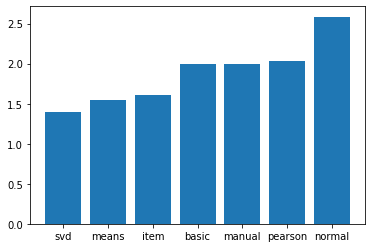

In [81]:
plt.bar(["svd","means","item","basic","manual","pearson","normal"], plot_preparation) 

In [82]:
plot_preparation = []
for n in rmse_mae_results :
    plot_preparation.append(n[2])
plot_preparation.sort()

<BarContainer object of 7 artists>

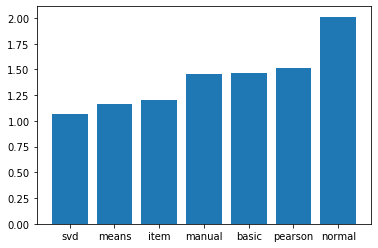

In [83]:
plt.bar(["svd","means","item","manual","basic","pearson","normal"], plot_preparation) 

Possiamo concludere che l'algoritmo migliore nel nostro caso è SVD poichè è quello che genera RMSE e MAE minori.
A questo punto cerchiamo il numero di fattori migliori per SVD.

In [84]:
grid = {
    "n_factors": [5, 10, 20,30,40,50,60,70,80,90,100],
    "random_state" :[859]
}

In [85]:
from surprise.model_selection import GridSearchCV
gs = GridSearchCV(SVD, grid, cv=kf, refit=True)

Attraverso l'attributo best_params di gs otteniamo qual'e il numero di fattori migliore

In [86]:
gs.fit(data)

In [87]:
gs.best_params

{'rmse': {'n_factors': 40, 'random_state': 859},
 'mae': {'n_factors': 40, 'random_state': 859}}

Visualizziamo adesso i valori medi degli RMSE e MAE ottenuti a seconda degli n fattori specificati .

In [88]:
pd.DataFrame(gs.cv_results).sort_values("mean_test_rmse")

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_n_factors,param_random_state
4,1.378975,1.478447,1.338481,1.379718,1.344548,1.384034,0.050184,1,1.050796,1.135401,...,1.057473,0.042053,1,0.109700,0.001498,0.006206,4.002573e-04,"{'n_factors': 40, 'random_state': 859}",40,859
3,1.384828,1.486666,1.361202,1.367437,1.344662,1.388959,0.050517,2,1.055730,1.135467,...,1.060426,0.039469,2,0.093285,0.001328,0.006206,4.001856e-04,"{'n_factors': 30, 'random_state': 859}",30,859
9,1.378525,1.492633,1.342237,1.380188,1.351818,1.389080,0.053845,3,1.051906,1.140488,...,1.062500,0.041194,3,0.179163,0.001550,0.006206,4.003049e-04,"{'n_factors': 90, 'random_state': 859}",90,859
8,1.386685,1.477328,1.352817,1.384164,1.351753,1.390549,0.045859,4,1.062610,1.142108,...,1.068718,0.039834,8,0.164738,0.001977,0.006216,3.960189e-04,"{'n_factors': 80, 'random_state': 859}",80,859
0,1.373847,1.473147,1.364495,1.384849,1.370110,1.393289,0.040480,5,1.050568,1.131132,...,1.064788,0.034678,4,0.054304,0.000742,0.006219,4.090021e-04,"{'n_factors': 5, 'random_state': 859}",5,859
10,1.381188,1.493321,1.357707,1.391566,1.354353,1.395627,0.050815,6,1.057019,1.141152,...,1.069711,0.038299,9,0.196979,0.005197,0.006206,4.004002e-04,"{'n_factors': 100, 'random_state': 859}",100,859
2,1.379553,1.487760,1.362578,1.389254,1.361944,1.396218,0.046931,7,1.049566,1.137777,...,1.066255,0.037184,7,0.079472,0.002156,0.006406,4.906217e-04,"{'n_factors': 20, 'random_state': 859}",20,859
1,1.387485,1.489557,1.357660,1.380504,1.367767,1.396595,0.047604,8,1.055160,1.143245,...,1.066107,0.039997,6,0.062864,0.001163,0.006206,4.004240e-04,"{'n_factors': 10, 'random_state': 859}",10,859
5,1.396780,1.486902,1.352057,1.386638,1.372940,1.399063,0.046406,9,1.060523,1.136405,...,1.065831,0.037635,5,0.127498,0.004941,0.006406,4.904270e-04,"{'n_factors': 50, 'random_state': 859}",50,859
7,1.392626,1.492077,1.365813,1.381156,1.377198,1.401774,0.045958,10,1.058213,1.147737,...,1.070999,0.039534,11,0.150325,0.000984,0.006205,4.001141e-04,"{'n_factors': 70, 'random_state': 859}",70,859


Creiamo ora una funzione che dato l'id di un utente gli consiglia i primi N anime.

In [89]:
def myFunc(a):
    return a[1]
def Recommend(uid):
    rec = []
    for n in np.unique(CleanDF["anime_id"]):
        rate = gs.predict(uid,n)[3]
        idx = AnimeId(n)
        name = AnimeDF.iloc[idx]["name"]
        rec.append((name,rate))
    return rec


Facciamo una prova con l'utente 50 consigliandoli i primi 30 anime nella sua classifica delle predizioni.

In [90]:
rec = Recommend(50)
rec.sort(key=myFunc,reverse=True)
rec[:30]

[('Fullmetal Alchemist: Brotherhood', 9.765082570769131),
 ('Steins;Gate', 9.369844405117423),
 ('Sen to Chihiro no Kamikakushi', 9.275300204129923),
 ('Clannad: After Story', 9.0374499516626),
 ('Kuroko no Basket 2nd Season', 9.037325219097458),
 ('Danshi Koukousei no Nichijou', 8.872449210031228),
 ('Code Geass: Hangyaku no Lelouch R2', 8.851524007961887),
 ('Tengen Toppa Gurren Lagann', 8.829232408134954),
 ('Shingeki no Kyojin', 8.815919585038277),
 ('Neon Genesis Evangelion: The End of Evangelion', 8.805748493989514),
 ('Detroit Metal City', 8.786011879193941),
 ('Kuroko no Basket', 8.75608714698486),
 ('JoJo no Kimyou na Bouken: Stardust Crusaders', 8.74748190814293),
 ('Howl no Ugoku Shiro', 8.732134300105955),
 ('Toki wo Kakeru Shoujo', 8.71703938640993),
 ('Monster', 8.710677444487848),
 ('Magi: The Kingdom of Magic', 8.698781478277436),
 ('Haikyuu!!', 8.694346396096847),
 ('Hotaru no Haka', 8.677935496597302),
 ('Code Geass: Hangyaku no Lelouch', 8.675378260335448),
 ('Hunter

<h1>6) Osservazioni finali :</h1>

L'idea di base dello sviluppo del progetto era quella di realizzare previsioni più o meno affidabili sui voti che un utente darebbe a un anime con lo scopo di poter consigliare a un utente indeciso i prossimi anime da visionare, detto questo ci riteniamo soddisfatti con i risultati ottenuti considerando il pool di utenti selezionato.
Inoltre ci è stato utile per capire a fondo il meccanismo di recommendation e per capire quali saranno i prossimi anime che guarderemo.